In [1]:
from google.colab import files
files.upload()

Saving Activitylog.csv to Activitylog.csv


{'Activitylog.csv': b"'activityid','userid','goccode','country','clientinfo','serverinfo','applicationname','perspectiveid','viewid','elementid','actionid','actiondetail','loggedfrom','lastupdate','responsetime','customizedinfo'\r\n1,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard.element.grid.handler.RelationshipGridForTreeLayoutHandler','2019-07-02 00:02:58.000',1328,\r\n2,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard.element.grid.handler.RelationshipGridForTreeLayoutHandler','2019-07-02 00:03:00.000',1247,\r\n3,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.on

In [2]:
!ls -Gflash --color

total 352K
4.0K drwxr-xr-x 1 root 4.0K Mar 24 10:53 ..
4.0K drwxr-xr-x 1 root 4.0K Mar 20 16:17 .config
4.0K drwxr-xr-x 1 root 4.0K Mar 24 10:55 .
336K -rw-r--r-- 1 root 333K Mar 24 10:55 Activitylog.csv
4.0K drwxr-xr-x 1 root 4.0K Mar 18 16:23 sample_data


In [0]:
from __future__ import absolute_import, print_function, unicode_literals, division
from builtins import range, input

In [33]:
!pip install imageio
!pip install chart_studio

     |████████████████████████████████| 81kB 6.6MB/s 


In [63]:
# import libraries
%%time
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import gc
gc.enable()
import sys
import csv
import glob
import json

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import chart_studio.plotly as py

plt.rc('font', size=12) 
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=14) 
plt.rcParams['figure.dpi'] = 100
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
sns.set_context("notebook")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

import datetime
import multiprocessing
import missingno as msno 
from tqdm import tqdm_notebook

import warnings
warnings.simplefilter('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 10.9 ms, sys: 0 ns, total: 10.9 ms
Wall time: 10.5 ms


In [0]:
# reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [65]:
# using multiprocessing, reducing memory usage and glob to read files
files = glob.glob("*.csv")

def load_data(file):
    return reduce_mem_usage(pd.read_csv(file))

with multiprocessing.Pool() as pool:
    df = pool.map(load_data, files)[0]

df = df.drop("'activityid'",axis=1)
print(df.shape)

Mem. usage decreased to  0.12 Mb (9.4% reduction)
(1123, 15)


In [0]:
# utility function for displaying data
from IPython.display import display, clear_output
def display_df(df):
  with pd.option_context("display.max_rows",10,"display.max_columns",100):
    display(df)

In [67]:
display_df(df)

,'userid','goccode','country','clientinfo','serverinfo','applicationname','perspectiveid','viewid','elementid','actionid','actiondetail','loggedfrom','lastupdate','responsetime','customizedinfo'
0,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:02:58.000',1328,NaN
1,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:00.000',1247,NaN
2,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:21.000',1023,NaN
3,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','PortfolioSummaryGridForTreeLayoutHandler.onLoad','RiskManager-Dashboard','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:32.000',1332,NaN
4,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','Top10GridForTreeLayoutHandler.onLoad','RiskManager-Dashboard','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:33.000',1628,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:17:34.000',30,NaN
1119,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:19:00.000',34,NaN
1120,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:19:01.000',30,NaN
1121,'kf82774','1871OY7043','PL','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','Navigator','51758','980013','','storageLoadElementData','application=CRCR; perspective=otc; domain=com...,'com.citi.risk.ui.controller.StorageController','2019-07-02 08:20:11.000',0,NaN


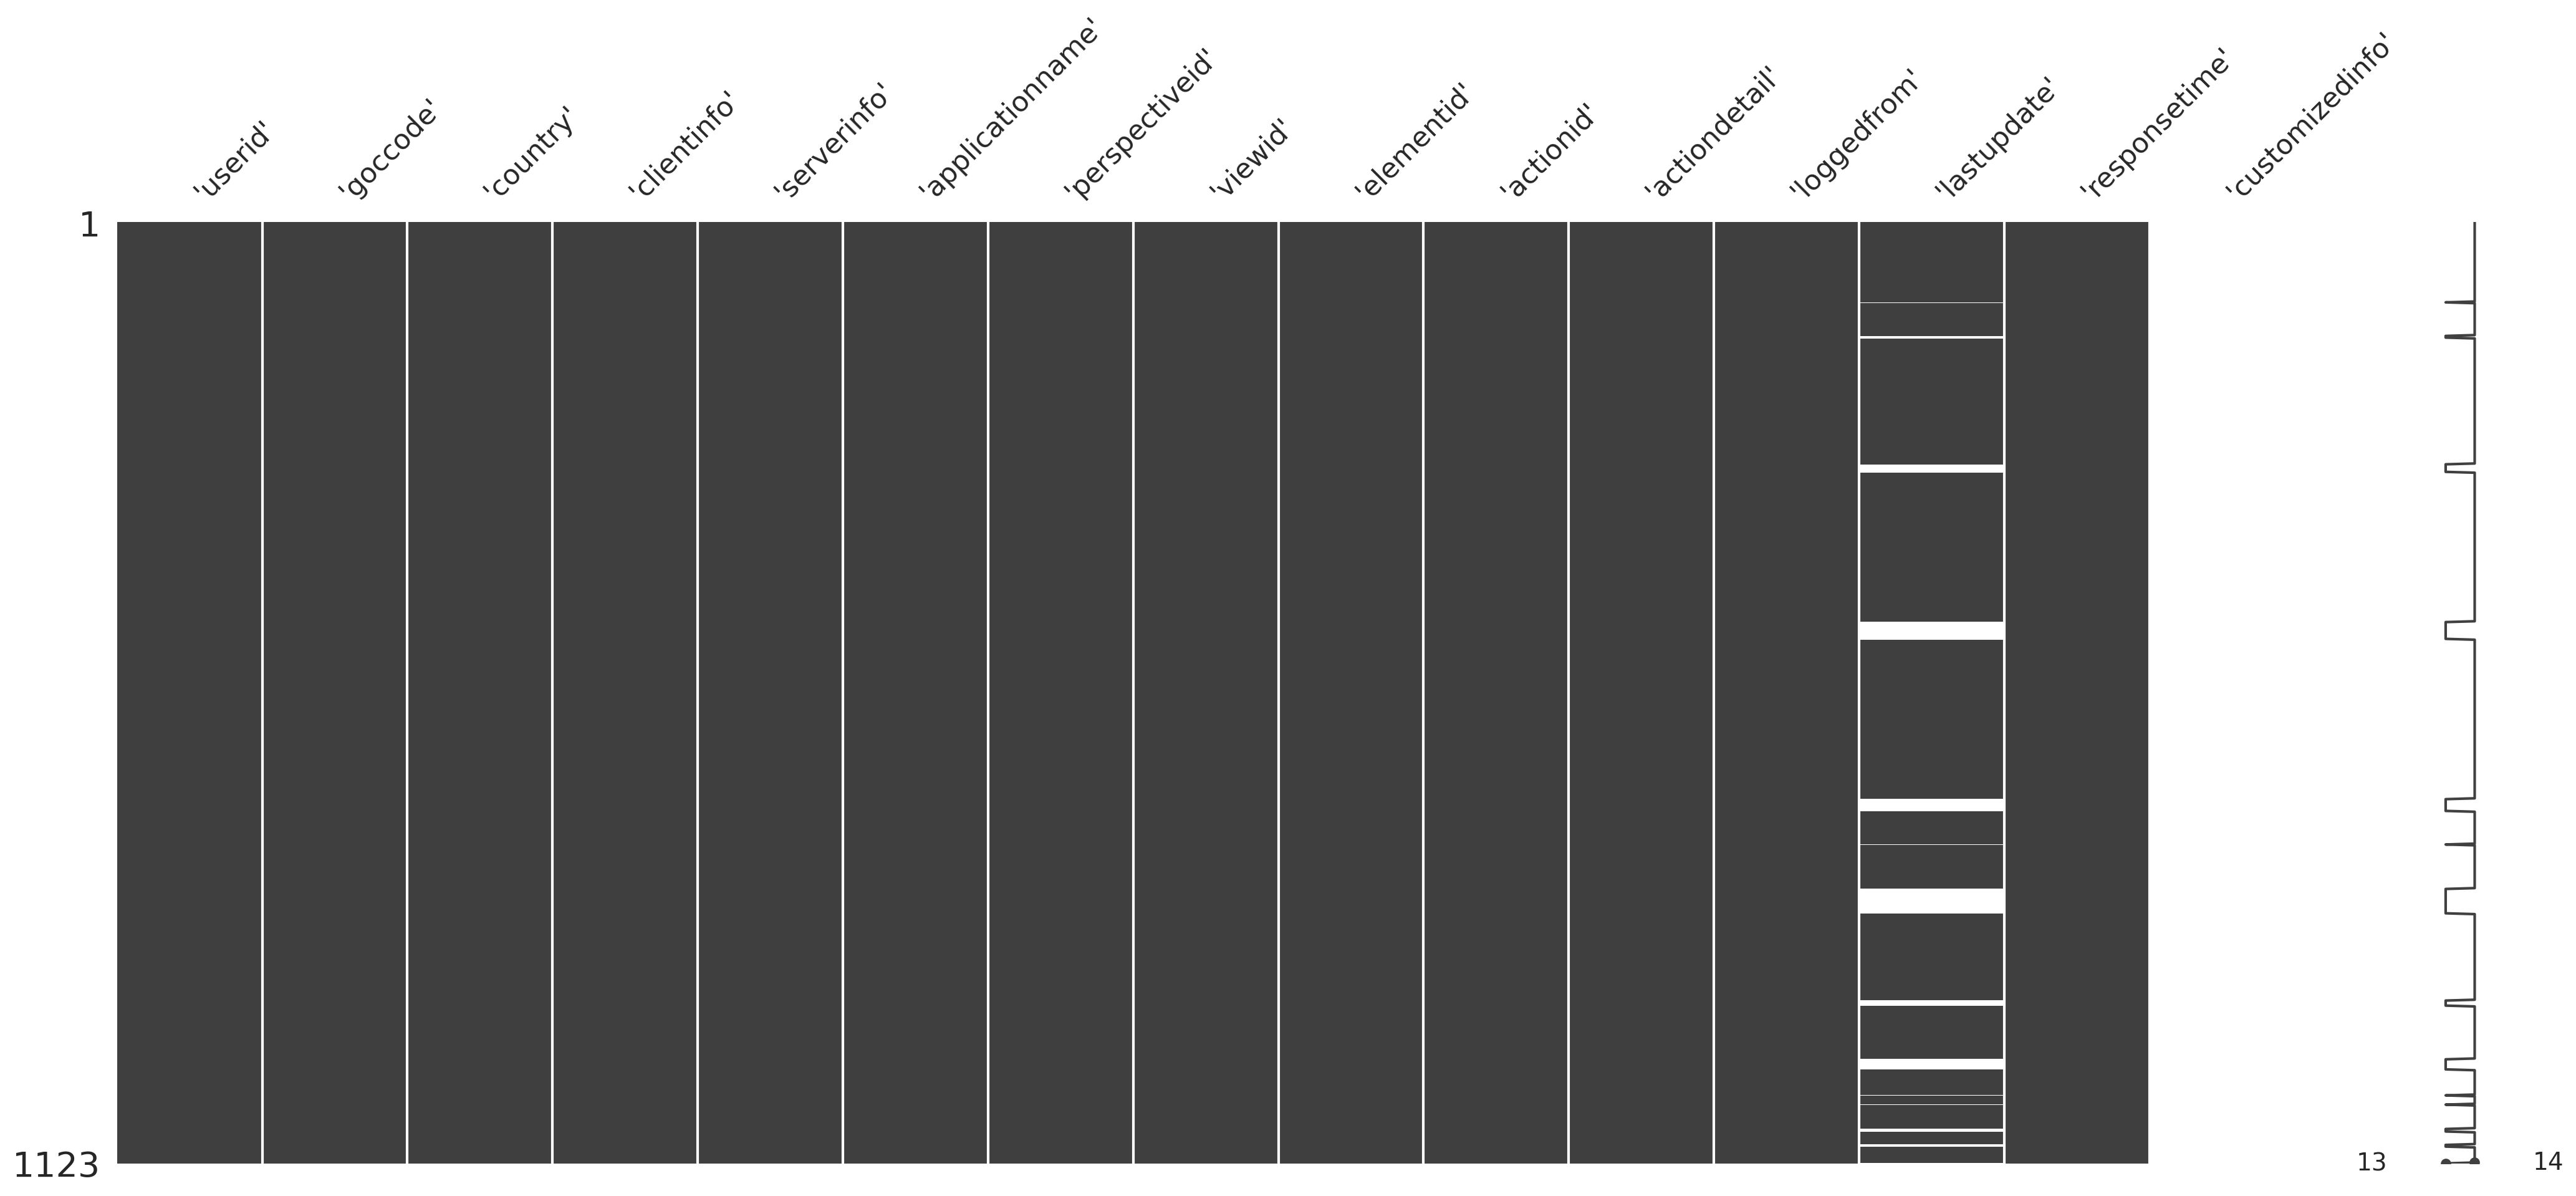

In [68]:
# check missing values
msno.matrix(df)

In [0]:
# drop data with missing values below a certain threshold - (0.7)
df_raw = df.loc[:, list(df.columns[df.isnull().sum().sort_values()/len(df)<0.7])]

In [55]:
display_df(df_raw)

,'userid','goccode','country','clientinfo','serverinfo','applicationname','perspectiveid','viewid','elementid','actionid','actiondetail','loggedfrom','lastupdate','responsetime'
0,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:02:58.000',1328
1,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:00.000',1247
2,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','RelationshipGridForTreeLayoutHandler.onload','Dashboard-Relationship-Utilization','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:21.000',1023
3,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','PortfolioSummaryGridForTreeLayoutHandler.onLoad','RiskManager-Dashboard','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:32.000',1332
4,'vd89220','31182622','IN','IE 11.0','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','Top10GridForTreeLayoutHandler.onLoad','RiskManager-Dashboard','com.citi.risk.icg.limitexposure.ui.dashboard....,'2019-07-02 00:03:33.000',1628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:17:34.000',30
1119,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:19:00.000',34
1120,'nt52152','31186626','IN','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','CRCRApplication','','','','FinancialsHistoryDrillDownHandler.onload','RelationshipView-DrillDown-Financials','com.citi.risk.icg.limitexposure.ui.customer.e...,'2019-07-02 08:19:01.000',30
1121,'kf82774','1871OY7043','PL','Chrome 74.0.3729.131','clmwiemap6u.nam.nsroot.net','Navigator','51758','980013','','storageLoadElementData','application=CRCR; perspective=otc; domain=com...,'com.citi.risk.ui.controller.StorageController','2019-07-02 08:20:11.000',0


In [56]:
display_df(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 14 columns):
'userid'             1123 non-null object
'goccode'            1123 non-null object
'country'            1123 non-null object
'clientinfo'         1123 non-null object
'serverinfo'         1123 non-null object
'applicationname'    1123 non-null object
'perspectiveid'      1123 non-null object
'viewid'             1123 non-null object
'elementid'          1123 non-null object
'actionid'           1123 non-null object
'actiondetail'       1123 non-null object
'loggedfrom'         1123 non-null object
'lastupdate'         1012 non-null object
'responsetime'       1123 non-null int16
dtypes: int16(1), object(13)
memory usage: 116.4+ KB


None

In [57]:
display_df(df_raw.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
'userid',1123,19,'as46669',338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'goccode',1123,6,'500056932',807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'country',1123,4,'IN',989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'clientinfo',1123,4,'Chrome 74.0.3729.131',1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'serverinfo',1123,1,'clmwiemap6u.nam.nsroot.net',1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
'actionid',1123,54,'storageLoadElementData',214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'actiondetail',1123,76,'application=CRCR; perspective=crcr',77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'loggedfrom',1123,35,'com.citi.risk.ui.controller.StorageController',357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'lastupdate',1012,803,'2019-07-02 06:56:58.000',6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
